#### Идея

Распределение разнообразных ограничительных частиц только, всего, лишь, именно. В русском такие частицы, как правило, присоединяюся к составляющей, с которой ассоциируются. 


Вопросы: 
1. Каковы предпочтения частиц относительно части речи их ассоциата.
2. Для каждой частицы, каково расстояние между частицей и её ассоциатом (дистантная ассоциация может быть более доступна для одних, чем для других).
3. Как частицы сочетаются друг с другом: все ли комбинаторные сочетания возможны? Есть ли предпочтения в порядке следования?
4. Какие свойства (предпочтения относительно части речи, расстояние ассоциации) имеют сочетания частиц. 

NB: Все числа должны быть относительными, а не абсолютными, т. е. абсолютные числа нужно делить на общее число употреблений.

# Restrictive scalar particles in Russian 

## Research idea

Restrictive scalar particles are kind of expressions that are sensitive to focus placement. They assosiate with the focused element and implicate that (a) the element they assosiate with is the lowest element on some semantic scale, (b) the stronger alternatives of the utterance (i. e. containing elements higher on the abovementioned semantic scale) are false. 

English language has (at least) three particles of this kind coexisting within a language. However, as one can notice they all have somewhat different distributional and semantic properties. 

|   Particle	|   Example	|   Inference	|
|:---	|:---	|:---	|
|   *only*	|   *He has only two children.*	|   -> He does not have more than two children.	|
|   *merely*	|   *It's merely a hearsay.*	|   -> It is not true/no more than a hearsay.	|
|   *just*	|   *She is just a waitress.*	|   -> She is not a cheuf cook.	|


<!-- |   Particle	|   Example	|
|:---	|:---	|
|   *only*	|   *He has only two children.*	|  
|   *only*	|   *It's only a hearsay.*|  
|   *only*	|   *She is only a waitress.*|  
|   *merely*	|   ?*He has merely two children.*	|  
|   *merely*	|   *It's merely hearsay.*	|  
|   *merely*	|   ??*She is merely a waitress.*	|  
|   *just*	|   *He has just two children.*	|  
|   *just*	|   *It's just a hearsay.*	|  
|   *just*	|   *She is just a waitress.*	|   -->

\
\
In Russian there are several restrictive scalar particles, as well: *только*, *лишь*, *всего*, *именно*.\
In this project I would like to have a look at these four particles and answer the following **questions**:
1. Do they have some preferences with regard to their assosiate (POS, syntactic position).
2. Some of these particles can combine with each other (*всего лишь*, *всего только*, *только лишь*). What combinations and orders are possible and how frequent they are?
3. What preferences (see bullet 1) do combinations of these particles have?


## The plan

1. Collecting the data for each particle from [the Russian National Corpus](https://ruscorpora.ru/new/), filtering out the examples with homonymous expressions and cases of particle combinations. 
2. Enrich the data with POS tagging and some syntactic analysis.
3. Analyze the compatibility of different particles with assosiates of different parts of speech and of different syntactic roles.
4. Make preliminary conclusions. 
5. Analyse the frequencies of combinations of particles.
6. Analyse the combinations ... 




First of all, let us write a function that will work with the RNC and will download the query results from the speified amount of pages (each result page contains 10 examples by default).

In [325]:
# import urllib.request
# from bs4 import BeautifulSoup

# def ruscorpora_extractor2(url):
    
#     # let's pretend to be a browser
#     user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' 
#     page = requests.get(url, headers={'User-Agent':user_agent})
    
#     soup = BeautifulSoup(page.text, 'html.parser')
#     parent_el = soup.find(class_ = "content")
#     download_el = parent_el.find_all(recursive=True)[-3]
#     download_lnk = "https://" + str(download_el.get('href'))
    
#     r = requests.get(download_lnk)
#     r.encoding = r.apparent_encoding
#     #access the data
#     print(r) 

In [17]:
import re
#import urllib.request
import pandas as pd 
from tqdm import tqdm
#import pprint
import requests
from bs4 import BeautifulSoup

def ruscorpora_extractor(pages_num, url):
    
    # pretend to be a browser
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' 
    examples = []

    # collect data from each page
    for page in tqdm(range(pages_num)):
     
        page = requests.get(url+ "&p=" + str(page), headers={'User-Agent':user_agent})
        soup = BeautifulSoup(page.text, 'html.parser')
        
        # navigating the page
        example_doc = soup.find("ol").find_all('table')
        
        # from each document take only one example
        for doc in example_doc:            
            ex = doc.find('li') 
            
            # get rid of the metadata
            unwanted = ex.find_all(class_= ["doc", "on", "prev", "b-kwic-expl"])
            for unw in unwanted: 
                unw.clear()
                
            example = ex.get_text().strip()
            examples.append(example)
            
        '''
        # for each document collect all the examples (there might be more than one)
        for doc in example_doc:  
            exs = doc.find_all('li')
            for ex in exs:
                
                # get rid of the metadata
                unwanted = ex.find_all(class_= ["doc", "on", "prev", "b-kwic-expl"])
                for unw in unwanted: 
                    unw.clear()
                
                example = ex.get_text().strip()
                examples.append(example)
            '''
            
    # write data to a dataframe
    output = pd.DataFrame({"text": examples})
    # data.to_csv(output_file+".csv", encoding='utf-8-sig')
    return output

**Comment**: since creating URLs in RNC is somewhat complex, and I wanted to use multiple-worded queries with regular expressions, I've decided to work with ready-to-use links to the result page rather than generating links. Below are the links to the corresponding result pages. 

Here are the queries I used: \
`lish_url` = \
`tolko_url` = included 'не' in the query \
`vsego_url` = since all of them are marked differently i didn't dinf a way to exclude homophonous analyses \
`imenno_url` = 

In [26]:
lish_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&min5=1&max5=1&lex1=-%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm1=&sem1=&flags1=&sem-mod4=sem&sem-mod4=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%D0%BB%D0%B8%D1%88%D1%8C&gramm2=&sem2=&flags2=&sem-mod5=sem&sem-mod5=semx&parent3=0&level3=0&min3=1&max3=1&lex3=-%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm3=&sem3=&flags3=&sem-mod6=sem&sem-mod6=semx' 
vsego_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&min5=1&max5=1&lex1=-%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm1=&sem1=&flags1=&sem-mod4=sem&sem-mod4=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%D0%B2%D1%81%D0%B5%D0%B3%D0%BE&gramm2=&sem2=&flags2=&sem-mod5=sem&sem-mod5=semx&parent3=0&level3=0&min3=1&max3=1&lex3=-%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm3=&sem3=&flags3=&sem-mod6=sem&sem-mod6=semx'
tolko_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&min5=1&max5=1&lex1=-%28%D0%BD%D0%B5%7C%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm1=&sem1=&flags1=&sem-mod4=sem&sem-mod4=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE&gramm2=&sem2=&flags2=&sem-mod5=sem&sem-mod5=semx&parent3=0&level3=0&min3=1&max3=1&lex3=-%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm3=&sem3=&flags3=&sem-mod6=sem&sem-mod6=semx'
imenno_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&min5=1&max5=1&lex1=-%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm1=&sem1=&flags1=&sem-mod4=sem&sem-mod4=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE&gramm2=&sem2=&flags2=&sem-mod5=sem&sem-mod5=semx&parent3=0&level3=0&min3=1&max3=1&lex3=-%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm3=&sem3=&flags3=&sem-mod6=sem&sem-mod6=semx'


Now let's collect the data for each query (the scrapping is quite slow, it is going to take some time).

In [24]:
lish_df = ruscorpora_extractor(25, lish_url)

100%|███████████████████████████████████████████| 25/25 [00:33<00:00,  1.34s/it]


In [36]:
lish_df

,text
0,"[shilo_83, nick] )) Не заладилось, потому как ..."
1,"[Rud, nick] Надевая колготки – синие, шерстян..."
2,[awesom13] Каждая семья здесь имеет свою исто...
3,"[karelea, жен] В нём душ родных вовек не сосч..."
4,"[Andron, муж] Даже определение «классика» не ..."
...,...
245,Очевидно лишь одно ― речь идёт не о тех суммах...
246,"Вопрос только в том, будет ли это происходить ..."
247,Но это лишь оттянет срок последних содроганий.
248,Звезда Поллукс превратилась в невидимку лишь б...


In [25]:
vsego_df = ruscorpora_extractor(25, vsego_url)


100%|███████████████████████████████████████████| 25/25 [00:37<00:00,  1.50s/it]


250

In [27]:
tolko_df = ruscorpora_extractor(25, tolko_url)

100%|███████████████████████████████████████████| 25/25 [01:18<00:00,  3.15s/it]


In [28]:
imenno_df = ruscorpora_extractor(25, imenno_url)

100%|███████████████████████████████████████████| 25/25 [00:33<00:00,  1.35s/it]


Now we are going to enrich the data with the following information: 
* dependency type of the particle
* the word the particle assosiates with (an assosiate) (indentified either syntactically or by juxtaposition)
    * if syntactically – is it located to the left or to the right of the particle.
    * distance between the particle and the assosiate
* POS of the assosiate
* dependency type of the assosiate

**COMMENT**
<!-- * Обогатить наш датафрейм следующими данными 
    * тип зависимости - для самой частицы
    * вершинное слово (текст)
    * часть речи вершины (сущ)  
    * тип зависимости у вершины (нужен ли?)
    * расстояние до вершины
    * вершина справа или слева
    * часть речи ближайшего правого 
    * части речи слов до вершины
   -->

First of all, let's see if it is possible to determine the assosiate of a particle based on syntactical dependency (in the form that is employed in SpaCy). 


In [238]:
ex_text_1 = "«От себя» добавляю только мелко нарезанный укроп."
ex_text_2 = "Оставалось только попросить его уйти."
ex_text_3 = "― В России всего восемь регионов, где финансовые дела обстоят относительно благополучно."
ex_text_4 = "так дурной вкус в искусстве радуется лишь эффектному орнаменту и не откликается на естественную красоту"
ex_text_5 = 'Ты наносишь капельку только тонкой кисточкой.'
ex_text_6 = 'Я желаю самого хорошего только моему народу.'
ex_text_7 = 'И только объем сделки ограничен размером страхового депозита.'
ex_text_8 = 'Он только зашел укрыться от дождя.'
ex_text_9 = 'Меня отпустили всего на несколько дней.'


In [ ]:
import spacy
nlp_ru = spacy.load("ru_core_news_sm")

In [223]:
def is_modifier(tag):
    if tag[-3:] == 'mod' in tag or 'acl' in tag or 'appos' in tag: 
        return True
    else:
        return False

In [1112]:
def collect_word_info(spacy_model, txt, target_word): 
    doc = spacy_model(txt)
    
    for token in doc:
        # collect data for the target word
        if token.text.lower() == target_word:
        
            # check if the head is a modifier, consider this modifier's head a new head
            true_head = token.head
            
            while is_modifier(true_head.dep_) != False:
                true_head = true_head.head
        
            if true_head.pos_ == "ROOT": 
                subtree_list = [token.head.text] 
            
            else:
                subtree = true_head.subtree
                subtree_list = []
                for t in subtree: 
                    if t.text != target_word:
                        subtree_list.append(t.text)
                    
            head_dict = {
                    "token" : token.text.lower(),
                    "dep_type" : token.dep_,
                    "pos" : token.pos_,

                    "immediate_head_text" : token.head.text,
                    "immediate_head_pos" : token.head.pos_, 
                    "immediate_head_dep_type" : token.head.dep_,

                    "higher_head_text" : true_head.text,
                    "higher_head_pos" : true_head.pos_, 
                    "higher_head_dep_type" : true_head.dep_, 

                    "assosiate_phrase" : ' '.join(subtree_list),
                    "assosiate_phrase_n" : len(subtree_list)
            }
            break 
        
    return head_dict

In [1059]:
collect_word_info(nlp_ru, ex_text_1, "только")
collect_word_info(nlp_ru, ex_text_2, "только")
collect_word_info(nlp_ru, ex_text_3, "всего")
collect_word_info(nlp_ru, ex_text_4, "лишь")


{'token': 'лишь',
 'dep_type': 'advmod',
 'pos': 'PART',
 'immediate_head_text': 'эффектному',
 'immediate_head_pos': 'ADJ',
 'immediate_head_dep_type': 'amod',
 'higher_head_text': 'орнаменту',
 'higher_head_pos': 'NOUN',
 'higher_head_dep_type': 'iobj',
 'assosiate_phrase': 'эффектному орнаменту',
 'assosiate_phrase_n': 2}

Now we will update the dataframes. \
Let's make copies and work with them. 

In [1060]:

vsego_df_updated = pd.DataFrame()
imenno_df_updated = pd.DataFrame()
tolko_df_updated = pd.DataFrame()
lish_df_updated = pd.DataFrame()


In [1061]:
vsego_df_updated

""


In [1113]:
for text in vsego_df["text"]: 
    info = collect_word_info(nlp_ru, text, "всего")
    vsego_df_updated = vsego_df_updated.append(info, ignore_index=True)

vsego_df_updated.head()

,token,dep_type,pos,immediate_head_text,immediate_head_pos,immediate_head_dep_type,higher_head_text,higher_head_pos,higher_head_dep_type,assosiate_phrase,assosiate_phrase_n
0,всего,advmod,PART,два,NUM,obj,два,NUM,obj,два : убивает Клауса и огревает бутылкой по го...,10.0
1,всего,advmod,PART,1,NUM,nummod,пятёрка,NOUN,conj,и 1 пятёрка,3.0
2,всего,fixed,PART,те,DET,nsubj,те,DET,nsubj,"те , кто считают , что они любят грузинскую му...",16.0
3,всего,advmod,PART,170,NUM,nummod,случаев,NOUN,obj,170 случаев кори,3.0
4,всего,advmod,PART,человек,NOUN,conj,человек,NOUN,conj,", около 100 человек",4.0


In [1114]:
for text in tolko_df["text"]: 
    info = collect_word_info(nlp_ru, text, "только")
    tolko_df_updated = tolko_df_updated.append(info, ignore_index=True)

tolko_df_updated.head()

,token,dep_type,pos,immediate_head_text,immediate_head_pos,immediate_head_dep_type,higher_head_text,higher_head_pos,higher_head_dep_type,assosiate_phrase,assosiate_phrase_n
0,только,advmod,PART,то,PRON,obj,то,PRON,obj,"то , за что мне платят",6.0
1,только,advmod,PART,заправки,NOUN,obl,заправки,NOUN,obl,после заправки,2.0
2,только,advmod,PART,тогда,ADV,advmod,Kachora,PROPN,ROOT,"[ Kachora , nick ] А еще ходить на пары все ...",37.0
3,только,advmod,PART,%,SYM,obl,%,SYM,obl,"на 30 % , а не на все 100",9.0
4,только,advmod,PART,слезы,NOUN,nsubj,слезы,NOUN,nsubj,слезы,1.0


In [1115]:
for text in imenno_df["text"]: 
    info = collect_word_info(nlp_ru, text, "именно")
    imenno_df_updated = imenno_df_updated.append(info, ignore_index=True)

imenno_df_updated.head()

,token,dep_type,pos,immediate_head_text,immediate_head_pos,immediate_head_dep_type,higher_head_text,higher_head_pos,higher_head_dep_type,assosiate_phrase,assosiate_phrase_n
0,именно,advmod,PART,так,ADV,advmod,воспринимаю,VERB,conj,", но себя в школе я так и воспринимаю",9.0
1,именно,advmod,PART,так,ADV,advmod,говорят,VERB,conj,", но большинство знакомых говорят так",6.0
2,именно,advmod,PART,сдельная,ADJ,amod,оплата,NOUN,cc,сдельная оплата труда,3.0
3,именно,advmod,PART,топориком,NOUN,obl,топориком,NOUN,obl,с этим топориком,3.0
4,именно,advmod,PART,методом,NOUN,obl,методом,NOUN,obl,― методом погружения,3.0


In [1116]:
for text in lish_df["text"]: 
    info = collect_word_info(nlp_ru, text, "лишь")
    lish_df_updated = lish_df_updated.append(info, ignore_index=True)

lish_df_updated.head()

,token,dep_type,pos,immediate_head_text,immediate_head_pos,immediate_head_dep_type,higher_head_text,higher_head_pos,higher_head_dep_type,assosiate_phrase,assosiate_phrase_n
0,лишь,advmod,PART,один,NUM,advcl,один,NUM,advcl,", потому как сдельная оплата ― один из способо...",12.0
1,лишь,advmod,PART,щиколотки,NOUN,obl,щиколотки,NOUN,obl,до щиколотки,2.0
2,лишь,advmod,PART,работе,NOUN,obl,работе,NOUN,obl,в работе на заводе ради собственного жилья,7.0
3,лишь,advmod,PART,одно,NUM,nsubj,одно,NUM,nsubj,одно,1.0
4,лишь,advmod,PART,часть,NOUN,obj,часть,NOUN,obj,часть истинного величия произведения,4.0


In [1067]:
lish_df_updated.to_csv("particle_lish.csv", index=None)
vsego_df_updated.to_csv("particle_vsego.csv", index=None)
imenno_df_updated.to_csv("particle_imenno.csv", index=None)
tolko_df_updated.to_csv("particle_tolko.csv", index=None)

Let's compare some numbers.

In [1068]:
print(vsego_df_updated['immediate_head_pos'].value_counts())
print('---')
print(vsego_df_updated['higher_head_pos'].value_counts())

NUM      134
NOUN      74
VERB      13
ADV       12
DET        4
SYM        4
ADJ        4
PRON       3
PROPN      1
PART       1
Name: immediate_head_pos, dtype: int64
---
NOUN     127
NUM       74
VERB      18
SYM        7
ADV        7
PROPN      5
PRON       5
DET        4
ADJ        2
X          1
Name: higher_head_pos, dtype: int64


In [1069]:
print(tolko_df_updated['immediate_head_pos'].value_counts())
print('---')
print(tolko_df_updated['higher_head_pos'].value_counts())


NOUN     100
VERB      40
ADJ       24
NUM       21
ADV       19
PRON      13
PROPN     12
DET        9
SCONJ      7
SYM        3
PART       2
Name: immediate_head_pos, dtype: int64
---
NOUN     138
VERB      42
PRON      15
PROPN     14
SYM       10
DET        9
NUM        8
SCONJ      6
ADJ        5
ADV        2
PART       1
Name: higher_head_pos, dtype: int64


One can notice that: 
1. Generally speaking, the difference between parts of speech preferences for immediate vs. higher head nouns is quite subtle. Though, it is visible for particular parts of speech (cf. ADJ, ADV, NUM with 'только' and lack of the difference for the same POSes with 'всего'). <!-- Probably particles that have similar profiles for immediate/higher head preferences can assosiate both with the words thay attach to and with the whole syntactic constituent).  -->
2. Particles do differ with regard to the preferrable parts of speech.

We can visualize the differences.

In [1088]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [1071]:
# create the dataframe containing the data on all particles
frames = [vsego_df_updated, imenno_df_updated, tolko_df_updated, lish_df_updated]
particles_all = pd.concat(frames)
len(particles_all)

1000

In [555]:
# particles_all_grouped = particles_all[['immediate_head_pos', 'token']].groupby(['immediate_head_pos', 'token'], as_index=False).size()

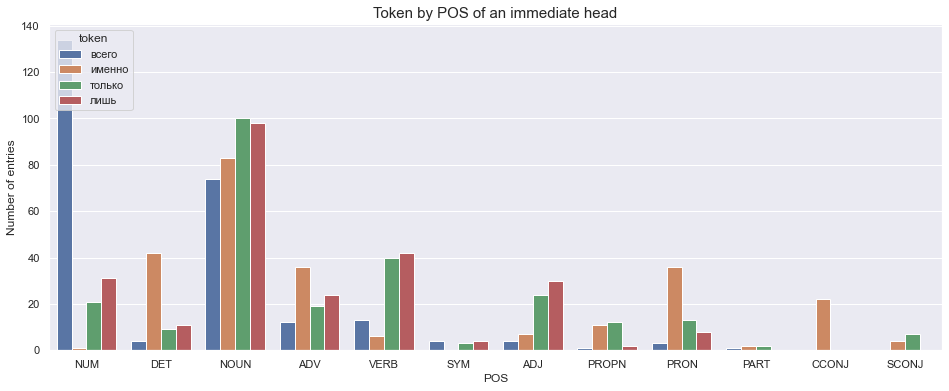

In [1090]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="immediate_head_pos", hue="token", data=particles_all)

plt.title('Token by POS of an immediate head', fontsize=15)
plt.xlabel('POS')
plt.ylabel('Number of entries')
plt.rcParams['figure.figsize'] = [16, 6]



Text(0.5, 0, 'Number of words')

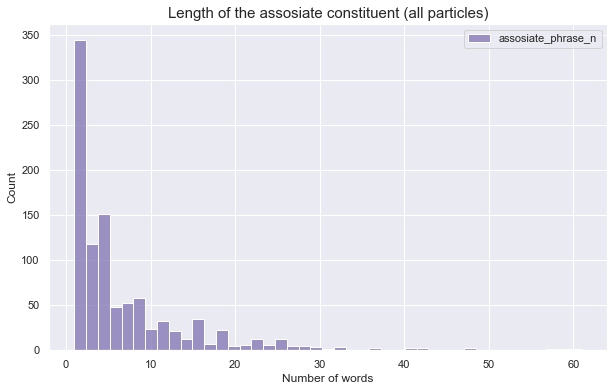

In [1110]:
plt.figure(figsize=(10, 6))
sns.histplot(particles_all[['assosiate_phrase_n']],  multiple="stack", palette="light:m_r")
plt.title('Length of the assosiate constituent (all particles)', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number of words')


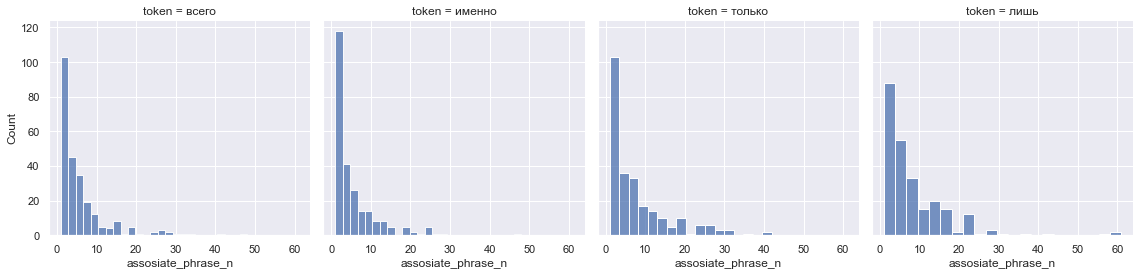

In [1111]:
g = sns.FacetGrid(particles_all, col="token", height=4, aspect=1)
g.map(sns.histplot, 'assosiate_phrase_n')


Let's investigate dependency properties

In [1050]:
vsego_dep_type = pd.DataFrame(data = {'immediate': [], 'higher': []})
imenno_dep_type = pd.DataFrame(data = {'immediate': [], 'higher': []})
tolko_dep_type = pd.DataFrame(data = {'immediate': [], 'higher': []})
lish_dep_type = pd.DataFrame(data = {'immediate': [], 'higher': []})

In [1051]:
vsego_tags = set(vsego_df_updated['immediate_head_dep_type']).union(set(vsego_df_updated['higher_head_dep_type']))
imenno_tags = set(imenno_df_updated['immediate_head_dep_type']).union(set(imenno_df_updated['higher_head_dep_type']))
tolko_tags = set(tolko_df_updated['immediate_head_dep_type']).union(set(tolko_df_updated['higher_head_dep_type']))
lish_tags = set(lish_df_updated['immediate_head_dep_type']).union(set(lish_df_updated['higher_head_dep_type']))

vsego_dep_type.set_index = list(vsego_tags)
imenno_dep_type.set_index = list(imenno_tags)
tolko_dep_type.set_index = list(tolko_tags)
lish_dep_type.set_index = list(lish_tags)

In [1052]:
vsego_counts_imm = vsego_df_updated['immediate_head_dep_type'].value_counts()
vsego_counts_hi = vsego_df_updated['higher_head_dep_type'].value_counts()
for val in vsego_counts_imm.index.values: 
    vsego_dep_type.at[val, 'immediate'] = vsego_counts_imm[val]
for val in vsego_counts_hi.index.values: 
    vsego_dep_type.at[val, 'higher'] = vsego_counts_hi[val]
    
vsego_dep_type = vsego_dep_type.fillna(0)
vsego_dep_type['mean'] = (vsego_dep_type['immediate'] + vsego_dep_type['higher']) / 2


imenno_counts_imm = imenno_df_updated['immediate_head_dep_type'].value_counts()
imenno_counts_hi = imenno_df_updated['higher_head_dep_type'].value_counts()
for val in imenno_counts_imm.index.values: 
    imenno_dep_type.at[val, 'immediate'] = imenno_counts_imm[val]
for val in imenno_counts_hi.index.values: 
    imenno_dep_type.at[val, 'higher'] = imenno_counts_hi[val]

imenno_dep_type = imenno_dep_type.fillna(0)
imenno_dep_type['mean'] = (imenno_dep_type['immediate'] + imenno_dep_type['higher']) / 2


tolko_counts_imm = tolko_df_updated['immediate_head_dep_type'].value_counts()
tolko_counts_hi = tolko_df_updated['higher_head_dep_type'].value_counts()
for val in tolko_counts_imm.index.values: 
    tolko_dep_type.at[val, 'immediate'] = tolko_counts_imm[val]
for val in tolko_counts_hi.index.values: 
    tolko_dep_type.at[val, 'higher'] = tolko_counts_hi[val]
    
tolko_dep_type = tolko_dep_type.fillna(0)
tolko_dep_type['mean'] = (tolko_dep_type['immediate'] + tolko_dep_type['higher']) / 2


lish_counts_imm = lish_df_updated['immediate_head_dep_type'].value_counts()
lish_counts_hi = lish_df_updated['higher_head_dep_type'].value_counts()
for val in lish_counts_imm.index.values: 
    lish_dep_type.at[val, 'immediate'] = lish_counts_imm[val]
for val in lish_counts_hi.index.values: 
    lish_dep_type.at[val, 'higher'] = lish_counts_hi[val] 
    
lish_dep_type = lish_dep_type.fillna(0)
lish_dep_type['mean'] = (lish_dep_type['immediate'] + lish_dep_type['higher']) / 2


In [1053]:
vsego_dep_type = vsego_dep_type[vsego_dep_type['mean'] > 8]
imenno_dep_type = imenno_dep_type[imenno_dep_type['mean'] > 8]
tolko_dep_type = tolko_dep_type[tolko_dep_type['mean'] > 8]
lish_dep_type = lish_dep_type[lish_dep_type['mean'] > 8]


In [1001]:
# print(vsego_dep_type.head())
# print(imenno_dep_type.head())
# print(tolko_dep_type.head())
# print(lish_dep_type.head())

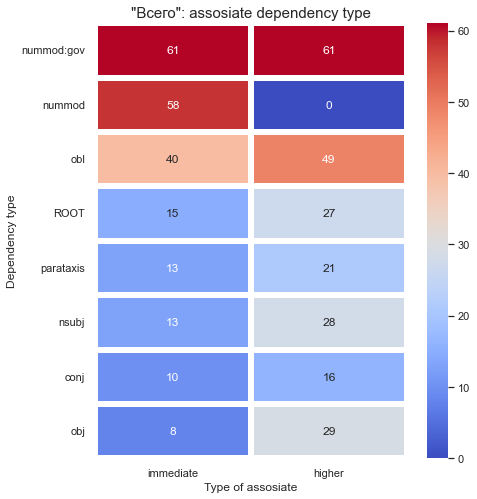

In [1054]:
data = vsego_dep_type.drop(columns='mean')
sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=6, linecolor='white')

plt.title('\"Всего\": assosiate dependency type', fontsize=15)
plt.yticks(rotation=0)
plt.xlabel("Type of assosiate")
plt.ylabel("Dependency type")
plt.figsize=(7, 6)
plt.show()

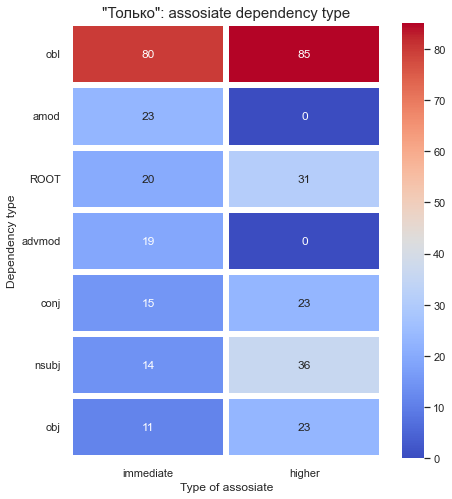

In [1055]:
data = tolko_dep_type.drop(columns='mean')
sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=6, linecolor='white')

plt.title('\"Только\": assosiate dependency type', fontsize=15)
plt.yticks(rotation=0)
plt.xlabel("Type of assosiate")
plt.ylabel("Dependency type")
plt.figsize=(7, 6)
plt.show()

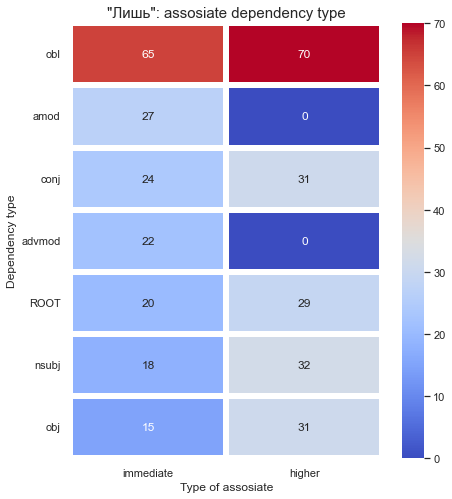

In [1056]:
data = lish_dep_type.drop(columns='mean')
sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=6, linecolor='white')

plt.title('\"Лишь\": assosiate dependency type', fontsize=15)
plt.yticks(rotation=0)
plt.xlabel("Type of assosiate")
plt.ylabel("Dependency type")
plt.figsize=(7, 6)
plt.show()


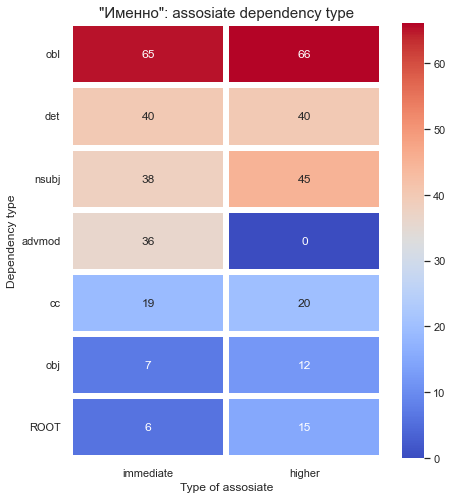

In [1057]:
data = imenno_dep_type.drop(columns='mean')
sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=6, linecolor='white')

plt.title('\"Именно\": assosiate dependency type', fontsize=15)
plt.yticks(rotation=0)
plt.xlabel("Type of assosiate")
plt.ylabel("Dependency type")
plt.figsize=(7, 6)
plt.show()


### Interim summary
 



## Combinations of particles

Let's explore the ways in which the particles combine. 

The queries: \
`vsegotolko_url`  – \
`vsegoimenno_url`  – \
`vsegolish_url`  – \
`tolkoimenno_url`  –  \
`tolkolish_url`  – lex1: (лишь|только), lex2: (лишь|только), distance: 1, additional: -bmark \
`imennolish_url`  – 


In [1118]:
vsegotolko_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&lex1=%28%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%29&gramm1=&sem1=&flags1=-bmark&sem-mod1=sem&sem-mod1=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%28%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%29&gramm2=&sem2=&flags2=&sem-mod2=sem&sem-mod2=semx'
vsegoimenno_url = 'https://processing.ruscorpora.ru/search.xml?flags1=-bmark&lang=ru&level1=0&level2=0&lex1=%28%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&lex2=%28%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&max2=1&min2=1&mode=main&nodia=1&p=0&parent1=0&parent2=0&sem-mod1=sem&sem-mod1=semx&sem-mod2=sem&sem-mod2=semx&sort=i_grtagging&text=lexgramm'
vsegolish_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&lex1=%28%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%BB%D0%B8%D1%88%D1%8C%29&gramm1=&sem1=&flags1=-bmark&sem-mod1=sem&sem-mod1=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%28%D0%B2%D1%81%D0%B5%D0%B3%D0%BE%7C%D0%BB%D0%B8%D1%88%D1%8C%29&gramm2=&sem2=&flags2=&sem-mod2=sem&sem-mod2=semx'
tolkoimenno_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&lex1=%28%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm1=&sem1=&flags1=-bmark&sem-mod1=sem&sem-mod1=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%28%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm2=&sem2=&flags2=&sem-mod2=sem&sem-mod2=semx'
tolkolish_url = 'https://processing.ruscorpora.ru/search.xml?flags1=-bmark&lang=ru&level1=0&level2=0&lex1=%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%29&lex2=%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%29&max2=1&min2=1&mode=main&nodia=1&parent1=0&parent2=0&sem-mod1=sem&sem-mod1=semx&sem-mod2=sem&sem-mod2=semx&sort=i_grtagging&text=lexgramm'
imennolish_url = 'https://processing.ruscorpora.ru/search.xml?env=alpha&api=1.0&mycorp=&mysent=&mysize=&mysentsize=&dpp=&spp=&spd=&mydocsize=&mode=main&lang=ru&sort=i_grtagging&nodia=1&text=lexgramm&parent1=0&level1=0&lex1=%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm1=&sem1=&flags1=-bmark&sem-mod1=sem&sem-mod1=semx&parent2=0&level2=0&min2=1&max2=1&lex2=%28%D0%BB%D0%B8%D1%88%D1%8C%7C%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%29&gramm2=&sem2=&flags2=&sem-mod2=sem&sem-mod2=semx'


In [1132]:
vsegotolko_df = pd.DataFrame()
vsegoimenno_df = pd.DataFrame()
vsegolish_df = pd.DataFrame()
tolkoimenno_df = pd.DataFrame()
tolkolish_df = pd.DataFrame()
imennolish_df  = pd.DataFrame()

In [1133]:
vsegotolko_df = ruscorpora_extractor(4, vsegotolko_url)
vsegoimenno_df = ruscorpora_extractor(4, vsegoimenno_url)
vsegolish_df = ruscorpora_extractor(4, vsegolish_url)

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.30it/s]


In [1134]:
tolkoimenno_df = ruscorpora_extractor(4, tolkoimenno_url)
tolkolish_df = ruscorpora_extractor(4, tolkolish_url)
imennolish_df  = ruscorpora_extractor(4, imennolish_url)

100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.04s/it]


In [1137]:
imennolish_df

,text
0,"Это, собственно, не будет духовным переворотом..."
1,"Один лишь русский даже в наше время, т. е. гор..."
2,Она будет иметь такое сочетание картографическ...
3,"Но мы ведь не трактат сочиняем, не анализ пров..."
4,"Однако человек, склонный верить гаданиям, запо..."
5,"Национальная психология, национальная «душа» к..."
6,"Один лишь русский, даже в наше время, то есть ..."
7,Но верно ли будет назвать день выхода человека...
8,Но романтизм лишь именно растравляет рану и ос...
9,"Так как неведомое, как мы видели, не только ок..."


Let's add some annotation the data.


In [1148]:
def collect_combo_data(df, comboparts): 
    
    ptcl_order = []
    ptcl_order_1 = ' '.join([comboparts[0], comboparts[1]])
    ptcl_order_2 = ' '.join([comboparts[1], comboparts[0]])
    
    for ex in df['text']:
        ex_lowered = ex.lower()
    
        if ptcl_order_1 in ex_lowered:
            ptcl_order.append('-'.join([comboparts[0], comboparts[1]]))
        elif ptcl_order_2 in ex_lowered:
            ptcl_order.append('-'.join([comboparts[1], comboparts[0]]))
        else: 
            ptcl_order.append('n/a')
            
    df["ptcl_order"] = ptcl_order  
    df["combination"] = ''.join([comboparts[0], comboparts[1]])
    df = df[df["ptcl_order"] != 'n/a']
    return df

In [1150]:
ptcl_dfs = {vsegotolko_df : ['всего' , 'только'], 
            vsegoimenno_df : ['всего' , 'только'], 
            vsegolish_df : ['всего' , 'только'],
            tolkoimenno_df : ['всего' , 'только'],
            tolkolish_df : ['всего' , 'только'],
            imennolish_df : ['всего' , 'только']}

for key, val in ptcl_dfs.items():
    df = collect_combo_data(key, val)
    df.head(10)


TypeError: string indices must be integers

In [1145]:
ptcl_order = []
vsegolish_df = pd.DataFrame()
tolkoimenno_df = pd.DataFrame()
tolkolish_df = pd.DataFrame()
imennolish_df  = pd.DataFrame()
for ex in vsegoimenno_df['text']:
    ex_lowered = ex.lower()
    if "всего именно" in ex_lowered:
        ptcl_order.append('v-t')
    elif "именно всего" in ex_lowered:
        ptcl_order.append('t-v')
    else: 
        ptcl_order.append('n/a')

vsegoimenno_df["ptcl_order"] = ptcl_order  
vsegoimenno_df["combination"] = 'vsegotolko'
vsegoimenno_df = vsegotolko_df[vsegotolko_df["ptcl_order"] != 'n/a']
vsegotolko_df.head(10)

,text,ptcl_order,combination
0,Всего только было у той картинки с Семеном общ...,v-t,vsegotolko
1,"― Вы знаете, ― говорю, ― мне об этом пока неуд...",v-t,vsegotolko
2,"Во, строгий какой, а самому всего только… скол...",v-t,vsegotolko
3,"Главное, Алёнке всего только шесть лет, а вот ...",v-t,vsegotolko
4,Мы жили в этом селе всего только через один до...,v-t,vsegotolko
5,Чего уж там! Купим для кухни сразу кожаную ме...,v-t,vsegotolko
6,"И только всего: проснуться, протянуть руку, чу...",t-v,vsegotolko
7,― Мы к вам всего только на несколько минут.,v-t,vsegotolko
8,Я его всего только разочек видел ― и где зе он...,v-t,vsegotolko
9,"Случилось же это всё ещё на Песках, когда Усти...",v-t,vsegotolko


Разметим данные
* тип сочетания
* свойства сочетания 

,text,ptcl_order
0,А что же он сам маленький человек с лёгкостью ...,l-t
1,Особенностью данного рода договоров является т...,t-l
2,Осталось только лишь определить какой из двух ...,t-l
3,В двух личных гонках немцы в первую десятку де...,t-l
5,В современных условиях стало очевидным что нел...,t-l
...,...,...
95,Только лишь извещения нового кредитора коллект...,t-l
96,6448 Игорь обложил Улицы поданью семь лет осаж...,t-l
97,Вроде бы прозрачная на первый взгляд задача на...,t-l
98,Мы бывали там верно вместе и готовили на огне ...,l-t


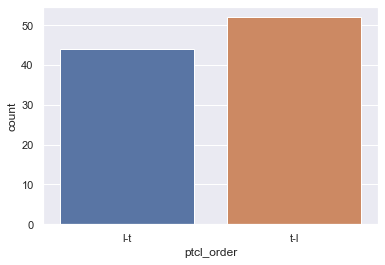

In [294]:
# sns.barplot(x="head_pos", y="size", hue='token', data=df2)
# plt.title('token by POS of a head')
# plt.xlabel('POS')
# plt.ylabel('number of entries');

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="ptcl_order", data=lish_tolko)


In [298]:
!pip install pywaffle


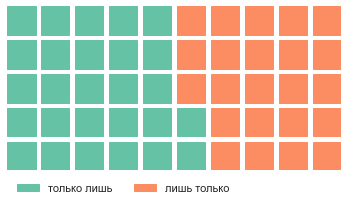

In [326]:
from pywaffle import Waffle

data = lish_tolko
counts = lish_tolko['ptcl_order'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[counts["t-l"], counts['l-t']],
    figsize=(5, 3),
    labels= ["только лишь", 'лишь только'],
    
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
)
plt.show()

Теперь давайте соберем информацию об этом сочетании. Нам интересно посмореть, с какой частью речи они ассоциируются, и сравнить это с одиночными. 

Слегка модифицируем функцию

In [442]:
def collect_combination_ana(text, combo1, combo2):
    if type(text) == str:
        d_ru = nlp_ru(text)
        
        for token in d_ru[0:-2]:
            token_index = token.i 
            next_token_index = token.i+1
            next_token = d_ru[next_token_index]
            
            #combo_list = combo.split(' ')
            
            combo_candidate = " ".join([token.lemma_, next_token.lemma_])
            if combo_candidate == combo2 or combo_candidate == combo1:
                #print(combo_candidate)
                for t in d_ru[next_token_index+1: ]:
                    if t.text not in STOP_WORDS and t.is_punct == False: 
                        assoc_text = t.text
                        assoc_pos = t.pos_
                        assoc_dep_type = t.dep_
                        break
                    else:
                        continue
                  
                try:
                    ana_dic = {
                        "text": text,
                        "particle order": combo_candidate,
                        "assoc_text": assoc_text,
                        "assoc_pos": assoc_pos,
                        "assoc_dep_type": assoc_dep_type
                    }
                
                except UnboundLocalError: 
                    print(text)
                    ana_dic = {
                        "text": text,
                        "particle order": combo_candidate,
                        "assoc_text": 'n/a',
                        "assoc_pos": 'n/a',
                        "assoc_dep_type": 'n/a'
                    }
                    
    return ana_dic
                    
            
                
#             if token.lemma_ == combo_list[0] and next_token.lemma_ == combo_list[1]:
#                 #print(token.text + " " + next_token.text)
#                 for t in d_ru[next_token_index+1: -1]:
#                     if t.text not in STOP_WORDS and t.is_punct == False: 
#                         assoc_text = t.text
#                         assoc_pos = t.pos_
#                         assoc_dep_type = t.dep_
#                         break
#                     else:
#                         continue
                
#             elif token.lemma_ == combo_list[1] and next_token.lemma_ == combo_list[0]:
#                 #print(token.text + " " + next_token.text)
#                 for t in d_ru[next_token_index+1: -1]:
#                     if t.text not in STOP_WORDS and t.is_punct == False: 
#                         assoc_text = t.text
#                         assoc_pos = t.pos_
#                         assoc_dep_type = t.dep_
#                         break
#                     else:
#                         continue
                
#             else: 
#                 assoc_text = 'n/a'
#                 assoc_pos = 'n/a'
#                 assoc_dep_type = 'n/a'
            
#             ana_dic = {
#                     "text": text,
#                     "particle order": ' '.join([token.text, next_token.text]),
#                     "assoc_text": assoc_text,
#                     "assoc_pos": assoc_pos,
#                     "assoc_dep_type": assoc_dep_type
#                 }
#             return ana_dic
                        
                    
                
                



In [443]:
lish_tolko2 = pd.DataFrame(data = {})

for text in lish_tolko["text"]: 
    ana = collect_combination_ana(text, "лишь только", "только лишь")
    lish_tolko2 = lish_tolko2.append(ana, ignore_index=True)




,text,particle order,assoc_text,assoc_pos,assoc_dep_type
0,А что же он сам маленький человек с лёгкостью ...,лишь только,появившись,VERB,advcl
1,Особенностью данного рода договоров является т...,только лишь,достижении,NOUN,obl
2,Осталось только лишь определить какой из двух ...,только лишь,определить,VERB,csubj
3,В двух личных гонках немцы в первую десятку де...,только лишь,двоих,NUM,nummod
4,В современных условиях стало очевидным что нел...,только лишь,подготовкой,NOUN,obl
...,...,...,...,...,...
91,Только лишь извещения нового кредитора коллект...,только лишь,извещения,NOUN,nsubj
92,6448 Игорь обложил Улицы поданью семь лет осаж...,только лишь,Крыму,PROPN,obl
93,Вроде бы прозрачная на первый взгляд задача на...,только лишь,желания,NOUN,obl
94,Мы бывали там верно вместе и готовили на огне ...,лишь только,палатках,NOUN,conj


In [444]:
lish_tolko2.to_csv("ptcl_lish_tolko2.csv", index=None)

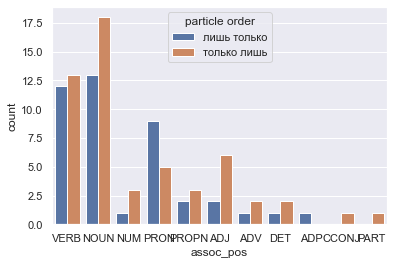

In [448]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="assoc_pos", hue="particle order", data=lish_tolko2)



In [520]:
counts_LT_assoc_dep = lish_tolko2[lish_tolko2["particle order"] == "лишь только"]['assoc_dep_type'].value_counts()
counts_LT_assoc_dep = counts_LT_assoc_dep[lambda x: x>=4]

In [521]:
counts_TL_assoc_dep = lish_tolko2[lish_tolko2["particle order"] == "только лишь"]['assoc_dep_type'].value_counts()
counts_TL_assoc_dep = counts_TL_assoc_dep[lambda x: x>=4]

In [586]:
sns.set_theme(style="darkgrid")
counts_assoc_dep = lish_tolko2[['assoc_dep_type',"particle order"]]
counts_assoc_dep 
# = counts_assoc_dep[lambda x: x>=4]
# #counts_assoc_dep
# counts_assoc_dep




,assoc_dep_type,particle order
0,advcl,лишь только
1,obl,только лишь
2,csubj,только лишь
3,nummod,только лишь
4,obl,только лишь
...,...,...
91,nsubj,только лишь
92,obl,только лишь
93,obl,только лишь
94,conj,лишь только


In [596]:
df2 = pd.DataFrame(counts_assoc_dep[['assoc_dep_type',"particle order"]].value_counts())
df2.reset_index(inplace=True)
df2.columns = ['assoc_dep_type',"particle order",'counts']

df3 = lish_tolko2.merge(df2,on=['assoc_dep_type',"particle order" ])

# df3 = 
#   a   counts
# 0 0   3
# 1 0   3
# 2 0   3
# 3 1   1
# 4 2   2
# 5 2   2

# filter
df4 = df3[df3['counts']>=4]
df4

,text,particle order,assoc_text,assoc_pos,assoc_dep_type,counts
0,А что же он сам маленький человек с лёгкостью ...,лишь только,появившись,VERB,advcl,4
1,Ах матушка сказала Лиза матери своей которая л...,лишь только,проснулась,VERB,advcl,4
2,Рука Вички ни разу не дрогнула глаза ее наблюд...,лишь только,сойдя,VERB,advcl,4
3,Все в жизни Вавилова было подчинено главному л...,лишь только,поступив,VERB,advcl,4
4,Особенностью данного рода договоров является т...,только лишь,достижении,NOUN,obl,13
5,В современных условиях стало очевидным что нел...,только лишь,подготовкой,NOUN,obl,13
6,Только лишь вечером я отмыкал цепь выводил Туз...,только лишь,вечером,NOUN,obl,13
7,Бюрократизм в наших организациях нельзя рассма...,только лишь,волокиту,NOUN,obl,13
8,Но о папе она говорила лишь только хорошее Те ...,только лишь,то,PRON,obl,13
9,Если ты мне любовь свою не даришь а только лиш...,только лишь,бриллиантами,NOUN,obl,13


obl     13
amod     7
ROOT     4
conj     4
Name: assoc_dep_type, dtype: int64

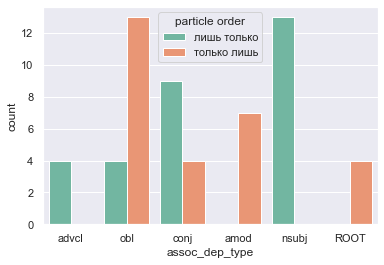

In [607]:
ax = sns.countplot(x="assoc_dep_type", hue="particle order", data=df4, palette="Set2")



In [218]:
results_lish = corp.search('лишь тольк', n_results=20, get_analysis=True)

"лишь": 100%|███████████████████████████████| 500/500 [00:05<00:00, 91.43docs/s]


[Result(query=лишь, N=500, params={'n_results': 500, 'kwic': True, 'n_left': None, 'n_right': None, 'query_language': None, 'subcorpus': 'main', 'get_analysis': True, 'gr_tags': None, 'start': 0, 'writing_system': None})]